# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    time.sleep(1)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | shimoda
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 1 | xique xique
Processing Record 8 of Set 1 | colonia
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | talcahuano
Processing Record 11 of Set 1 | ahau
City not found. Skipping...
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | rio grande
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | severo-yeniseyskiy
Processing Record 18 of Set 1 | ghat
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | nueva gerona
Processing Re

Processing Record 39 of Set 4 | jiamusi
Processing Record 40 of Set 4 | tumayr
Processing Record 41 of Set 4 | coahuayana de hidalgo
Processing Record 42 of Set 4 | lhasa
Processing Record 43 of Set 4 | hermanus
Processing Record 44 of Set 4 | tsiombe
Processing Record 45 of Set 4 | smithers
Processing Record 46 of Set 4 | weno
Processing Record 47 of Set 4 | rongelap
Processing Record 48 of Set 4 | chiili
City not found. Skipping...
Processing Record 49 of Set 4 | sasayama
Processing Record 0 of Set 5 | enewetak
Processing Record 1 of Set 5 | dongdu
Processing Record 2 of Set 5 | changtu
Processing Record 3 of Set 5 | haiku-pauwela
Processing Record 4 of Set 5 | ishii
Processing Record 5 of Set 5 | mil'kovo
Processing Record 6 of Set 5 | ad dilam
Processing Record 7 of Set 5 | ulladulla
Processing Record 8 of Set 5 | oriximina
Processing Record 9 of Set 5 | bikenibeu village
Processing Record 10 of Set 5 | puerto real
Processing Record 11 of Set 5 | taroa
Processing Record 12 of Set 5

Processing Record 28 of Set 8 | san patricio
Processing Record 29 of Set 8 | khao wong
Processing Record 30 of Set 8 | port macquarie
Processing Record 31 of Set 8 | savave village
City not found. Skipping...
Processing Record 32 of Set 8 | umm kaddadah
Processing Record 33 of Set 8 | gaspe
Processing Record 34 of Set 8 | ba
City not found. Skipping...
Processing Record 35 of Set 8 | puerto penasco
Processing Record 36 of Set 8 | elbasan
Processing Record 37 of Set 8 | magadan
Processing Record 38 of Set 8 | arrifes
Processing Record 39 of Set 8 | partapur
Processing Record 40 of Set 8 | quisqueya
Processing Record 41 of Set 8 | san martin
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | kerikeri
Processing Record 44 of Set 8 | bodaybo
Processing Record 45 of Set 8 | puerto lempira
Processing Record 46 of Set 8 | mogocha
Processing Record 47 of Set 8 | punta arenas
Processing Record 48 of Set 8 | fabriano
Processing Record 49 of Set 8 | yeniseysk
Processing Record 0

Processing Record 18 of Set 12 | zaozersk
Processing Record 19 of Set 12 | eyl
Processing Record 20 of Set 12 | koungheul
Processing Record 21 of Set 12 | goonellabah
Processing Record 22 of Set 12 | markha
Processing Record 23 of Set 12 | kisanga
Processing Record 24 of Set 12 | upington
Processing Record 25 of Set 12 | ishigaki
Processing Record 26 of Set 12 | kourou
Processing Record 27 of Set 12 | valladolid
Processing Record 28 of Set 12 | nampula
Processing Record 29 of Set 12 | yamada
Processing Record 30 of Set 12 | anaconda
Processing Record 31 of Set 12 | anabar
City not found. Skipping...
Processing Record 32 of Set 12 | sanya
Processing Record 33 of Set 12 | itaituba
Processing Record 34 of Set 12 | perumpavur
Processing Record 35 of Set 12 | dikhil
Processing Record 36 of Set 12 | tchintabaraden
Processing Record 37 of Set 12 | robore
Processing Record 38 of Set 12 | shingu
Processing Record 39 of Set 12 | kayapinar
Processing Record 40 of Set 12 | muisne
Processing Record

In [38]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.95,57,79,3.58,TF,1690784969
1,adamstown,-25.0660,-130.1015,19.09,57,9,9.86,PN,1690784970
2,west island,-12.1568,96.8225,23.99,94,75,10.29,CC,1690784958
3,shimoda,34.6667,138.9500,31.72,73,99,5.23,JP,1690784973
4,petropavlovsk-kamchatsky,53.0452,158.6483,13.33,82,75,5.00,RU,1690784974
...,...,...,...,...,...,...,...,...,...
566,uacu cungo,-11.3634,15.1208,20.96,52,4,1.69,AO,1690785694
567,yaren,-0.5472,166.9160,28.72,72,76,2.59,NR,1690785695
568,yumaguzino,52.9041,56.3933,26.44,46,10,3.16,RU,1690785697
569,le mars,42.7942,-96.1656,21.43,100,0,0.00,US,1690785698


In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,275.10,57,79,3.58,TF,1690782507
1,adamstown,-25.0660,-130.1015,292.24,57,9,9.86,PN,1690782407
2,west island,-12.1568,96.8225,299.14,83,75,7.72,CC,1690782510
3,shimoda,34.6667,138.9500,304.87,73,99,5.23,JP,1690782511
4,petropavlovsk-kamchatsky,53.0452,158.6483,286.48,88,75,5.00,RU,1690782512


In [33]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,275.10,57,79,3.58,TF,1690782507
1,adamstown,-25.0660,-130.1015,292.24,57,9,9.86,PN,1690782407
2,west island,-12.1568,96.8225,299.14,83,75,7.72,CC,1690782510
3,shimoda,34.6667,138.9500,304.87,73,99,5.23,JP,1690782511
4,petropavlovsk-kamchatsky,53.0452,158.6483,286.48,88,75,5.00,RU,1690782512


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

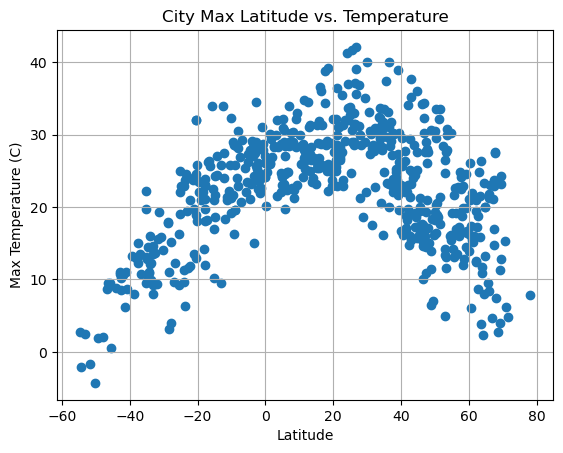

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

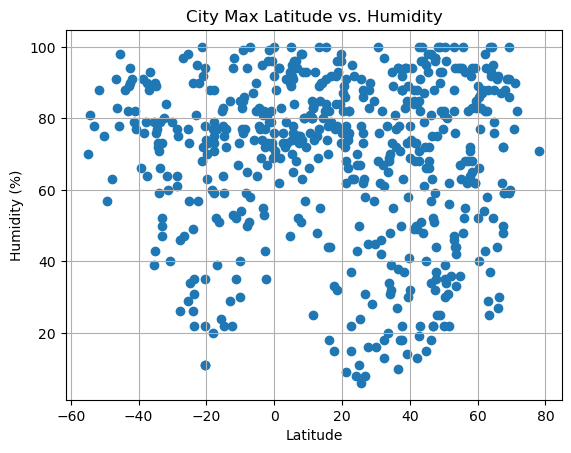

In [43]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

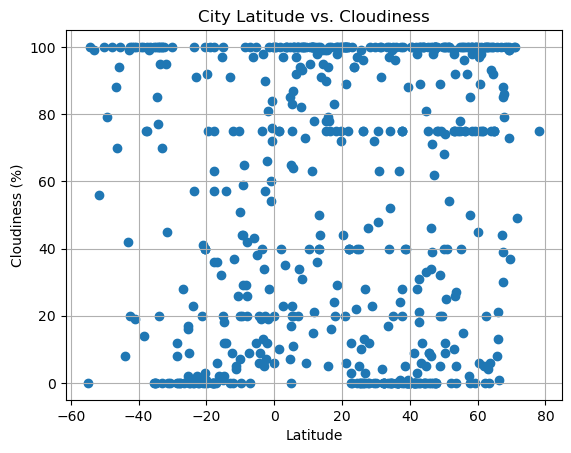

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE